MACHINE LEARNING (LAB ASSIGNMENT-02)

NAME : KAMPALLI RISHITHA


REG NO : BL.SC.U4AIE24020

SEC : D.sec

In [ ]:
## Initially  we should install required libraries as numpy, pandas etc

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
## we should load data
from google.colab import files
uploaded = files.upload()
data = pd.ExcelFile("Lab Session Data.xlsx")
print("Available sheets:",data.sheet_names)

Saving Lab Session Data.xlsx to Lab Session Data.xlsx
Available sheets: ['Purchase data', 'IRCTC Stock Price', 'thyroid0387_UCI', 'marketing_campaign']


(A1) RANK OF MATRIX AND PSEUDO INVERSE

In [31]:
## X = features (Candies,Mangoes,Milk)
## Y = output(cost of single product)
## we have 3 features(candies,mangoes,milk)
## pseudo-inverse gives estimate product cost

#loading purchase data sheet from the Lab Session Data excel into panda dataframe
purchase = pd.read_excel(data, sheet_name="Purchase data")
#extracting features matrix x:
X = purchase[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
#extracting output as Y:(i.e; cost of each single item)
y = purchase['Payment (Rs)'].values
#calculating the rank tells us no of independent features(columns)
rank_X = np.linalg.matrix_rank(X)
print("Rank of feature matrix:", rank_X)
#we use pseudo inverse if matrix is not square or not invertible
X_pinv = np.linalg.pinv(X)
#multiplying pseudo inverse of X with Y
costs = X_pinv @ y
print(f"Estimated costs: Candies={costs[0]:.2f}, Mangoes={costs[1]:.2f}, Milk={costs[2]:.2f}")

Rank of feature matrix: 3
Estimated costs: Candies=1.00, Mangoes=55.00, Milk=18.00


(A2) CLASSIFYING RICH AND POOR

In [20]:
# Create a new column 'Class' in the DataFrame.
# For each row, check the 'Payment (Rs)' value:
# - If greater than 200, assign 'RICH'
# - Otherwise, assign 'POOR'
purchase['Class'] = purchase['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
# initializing logistic regression classifier
clf = LogisticRegression()
# Train the classifier using:
# Feature matrix X and
# from the 'Class' column (RICH/POOR)
clf.fit(X, purchase['Class'])
#using trained classifier to predict the class for each row
#storing predictions in new column 'predicted_class'
purchase['Predicted_Class'] = clf.predict(X)
# by default it shows only first 5 rows , if we need more (puchase.head(n),n is no of rows)
purchase.head()

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Candy,Mango,Milk,Class,Predicted_Class
0,C_1,20,6,2,386,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,55.0,18.0,RICH,RICH
1,C_2,16,3,6,289,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RICH,RICH
2,C_3,27,6,2,393,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RICH,RICH
3,C_4,19,1,2,110,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POOR,POOR
4,C_5,24,4,2,280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RICH,RICH


(A3) IRCTC STOCK DATA

In [21]:
#This code calculates the mean and variance of IRCTC stock prices using both numpy and custom functions,
#then estimates the probability of loss by checking how often the percentage change is negative.

#loading the "IRCTC stock price" sheet from the excel
stock_df = pd.read_excel(data, sheet_name="IRCTC Stock Price")
#calculating the mean of price column using numpy
mean_price = np.mean(stock_df['Price'])
#calcualting variance of price column using numpy
var_price = np.var(stock_df['Price'])
#printing mean and variance of price
print("Mean:", mean_price, "Variance:", var_price)
#define function to calculate mean manually using formula
def my_mean(arr):
  return sum(arr)/len(arr)
#defining the function to calculate variance manually using formula
def my_var(arr):
    m = my_mean(arr)
    return sum((x-m)**2 for x in arr)/len(arr)
#printing mean and variance
print("Custom Mean:", my_mean(stock_df['Price']))
print("Custom Variance:", my_var(stock_df['Price']))
# Calculate probability of loss in stock
# 'Chg%' column shows percentage change in price
# Condition (stock_df['Chg%'] < 0) gives True for losses
# .mean() on boolean values gives fraction of True values = probability of loss
loss_prob = (stock_df['Chg%'] < 0).mean()
print("Probability of loss:", loss_prob)

Mean: 1560.6634538152612 Variance: 58496.49239931618
Custom Mean: 1560.6634538152612
Custom Variance: 58496.492399316136
Probability of loss: 0.4979919678714859


(A4) THYROID DATA EXPLORATION

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

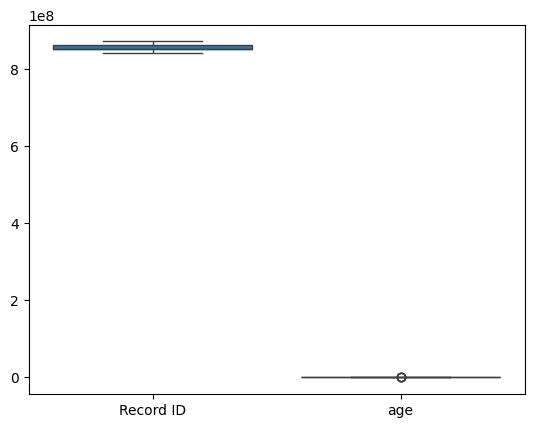

In [32]:
#loading the "thyroid0387_UCi" sheet from excel
thyroid_df = pd.read_excel(data, sheet_name="thyroid0387_UCI")
#print data types of each column
print(thyroid_df.dtypes)
#to print count of missing values in each column
print(thyroid_df.isnull().sum())
# Create a boxplot for all numeric columns in the DataFrame
# Boxplots show the distribution, median, quartiles, and potential outliers
sns.boxplot(data=thyroid_df.select_dtypes(include='number'))
#display the visualisation
plt.show()

(A5 AND A6) SIMILARITY MEASURE


In [23]:
#define 2 binary vectors
v1 = np.array([1,0,1,1,0])
v2 = np.array([1,1,0,1,0])
#define jaccard similarity function
def jaccard(v1, v2):
  # f11 = count of positions where both vectors have 1
    f11 = sum((v1==1) & (v2==1))
  # f01 = count of positions where v1=0 and v2=1
    f01 = sum((v1==0) & (v2==1))
  # f10 = count of positions where v1=1 and v2=0
    f10 = sum((v1==1) & (v2==0))
  #formula to find jaccard similarity:
    return f11 / (f11+f01+f10)
#define Simple Matching Coefficient function
def smc(v1, v2):
  # f11 = count of positions where both vectors have 1
    f11 = sum((v1==1) & (v2==1))
  # f00 = count of positions where both vectors have 0
    f00 = sum((v1==0) & (v2==0))
  # f01 = count of positions where v1=0 and v2=1
    f01 = sum((v1==0) & (v2==1))
  # f10 = count of positions where v1=1 and v2=0
    f10 = sum((v1==1) & (v2==0))
  #formula to find SMC:
    return (f11+f00)/(f11+f00+f01+f10)
#define cosine similarity function
def cosine(v1, v2):
    return np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))
#printing the values
print("Jaccard:", jaccard(v1,v2))
print("SMC:", smc(v1,v2))
print("Cosine:", cosine(v1,v2))

Jaccard: 0.5
SMC: 0.6
Cosine: 0.6666666666666667


(A7) HEATMAP :
This code generates a 20×20 similarity matrix (currently filled with random values) and visualizes it as a heatmap. Each cell in the heatmap represents the similarity between two items, with colors indicating strength: cooler colors for lower similarity and warmer colors for higher similarity. In practice, you would replace the random matrix with actual similarity scores computed using Jaccard, SMC, or Cosine similarity for your dataset.


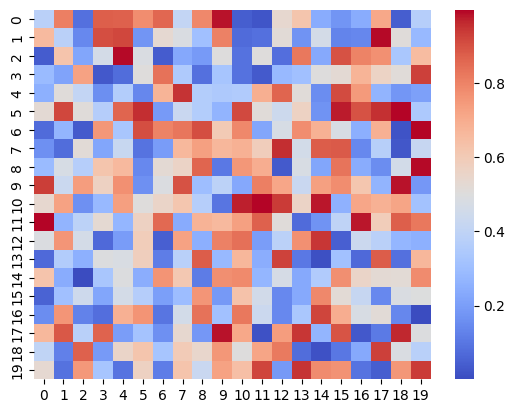

In [24]:
#Create a 20x20 random similarity matrix with values between 0 and 1
# similarity values computed using Jaccard, SMC, or Cosine functions)
similarity_matrix = np.random.rand(20,20)
# Plot the similarity matrix as a heatmap using seaborn
# 'cmap="coolwarm"' sets the color scheme: cool colors for low values,
# warm colors for high values
sns.heatmap(similarity_matrix, cmap="coolwarm")
plt.show()

(A8) DATA IMPUTATION :
This code handles missing values in the thyroid dataset. Numeric columns are imputed with the mean if no outliers are present, or the median if outliers exist (to reduce skew). Categorical columns are imputed with the mode (most frequent value). Finally, the script prints the count of missing values after imputation, confirming that all gaps have been filled.






In [27]:
# Separate numeric and categoric columns
numeric_cols = thyroid_df.select_dtypes(include='number').columns
categorical_cols = thyroid_df.select_dtypes(exclude='number').columns

# Fill numeric columns
for col in numeric_cols:
  #checking if column has missing values
    if thyroid_df[col].isnull().sum() > 0:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = thyroid_df[col].quantile(0.25)
        Q3 = thyroid_df[col].quantile(0.75)
        # Interquartile Range (IQR) = Q3 - Q1
        IQR = Q3 - Q1
        # Count outliers: values outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
        outliers = ((thyroid_df[col] < (Q1 - 1.5 * IQR)) | (thyroid_df[col] > (Q3 + 1.5 * IQR))).sum()
            #If outliers exist, fill missing values with median
        if outliers > 0:
            thyroid_df[col].fillna(thyroid_df[col].median(), inplace=True)
            # Otherwise, fill missing values with mean
        else:
            thyroid_df[col].fillna(thyroid_df[col].mean(), inplace=True)

# Fill categorical columns ---
for col in categorical_cols:
  # If the column has missing values, fill with mode (most frequent value)
    if thyroid_df[col].isnull().sum() > 0:
        thyroid_df[col].fillna(thyroid_df[col].mode()[0], inplace=True)
#summary of missing values after imputation
print("Missing values after imputation:\n")
print(thyroid_df.isnull().sum())

Missing values after imputation:

Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype

(A9) NORMALISATION :
This code normalizes all numeric columns in the thyroid dataset using MinMax scaling, which transforms values into the range 0–1. After scaling, the first 20 rows of the numeric columns are displayed, showing that every feature has been rescaled consistently.


In [33]:
## Initialize a MinMaxScaler object from scikit-learn
# This scales values to the range [0, 1]
scaler = MinMaxScaler()
# Apply MinMax scaling to all numeric columns in the thyroid dataset
# select_dtypes(include='number') picks only numeric columns
# fit_transform() learns min/max values and scales data accordingly
thyroid_df[thyroid_df.select_dtypes(include='number').columns] = scaler.fit_transform(
    thyroid_df.select_dtypes(include='number')

)
# Show the first 20 rows of the normalized numeric columns
# All values will now be between 0 and 1
thyroid_df[thyroid_df.select_dtypes(include='number').columns].head(20)

,Record ID,age
0,0.000000e+00,0.000427
1,3.410871e-08,0.000427
2,9.891527e-07,0.000610
3,6.934301e-05,0.000534
4,6.937712e-05,0.000473
5,6.941123e-05,0.000900
6,7.009341e-05,0.001160
7,2.048569e-04,0.000412
8,2.403641e-04,0.000412
9,2.408075e-04,0.000412
